In [169]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import boxplot
from sklearn.linear_model import LogisticRegression

In [170]:
def read_data(file_path):
    data = []
    with open(file_path, 'r') as file:
        next(file)  # Skip the header line
        for line in file:
            patient_data = line.strip().split(',')
            data.append({
                'PatientID': int(patient_data[0]),
                'Readmission': int(patient_data[1]),
                'StaffSatisfaction': int(patient_data[2]),
                'CleanlinessSatisfaction': int(patient_data[3]),
                'FoodSatisfaction': int(patient_data[4]),
                'ComfortSatisfaction': int(patient_data[5]),
                'CommunicationSatisfaction': int(patient_data[6])
            })
    return data


In [171]:
def calculate_statistics(data, hospital_name):
    print(f"\n{hospital_name} Data Analysis:")
    print("----------------------")

    readmitted_count = sum(patient['Readmission'] for patient in data)
    print(f"Number of Patients Readmitted: {readmitted_count}")

    categories = ['StaffSatisfaction', 'CleanlinessSatisfaction', 'FoodSatisfaction',
                  'ComfortSatisfaction', 'CommunicationSatisfaction']
    for category in categories:
        average_score = np.mean([patient[category] for patient in data])
        print(f"Average {category.replace('Satisfaction', '')} Satisfaction: {average_score:.2f}")



Hospital 1 Data Analysis:
----------------------
Number of Patients Readmitted: 38
Average Staff Satisfaction: 3.51
Average Cleanliness Satisfaction: 3.61
Average Food Satisfaction: 3.51
Average Comfort Satisfaction: 3.72
Average Communication Satisfaction: 3.70

Logistic Regression Results:
Correlation between Overall Satisfaction Scores and Readmission: Weak correlation


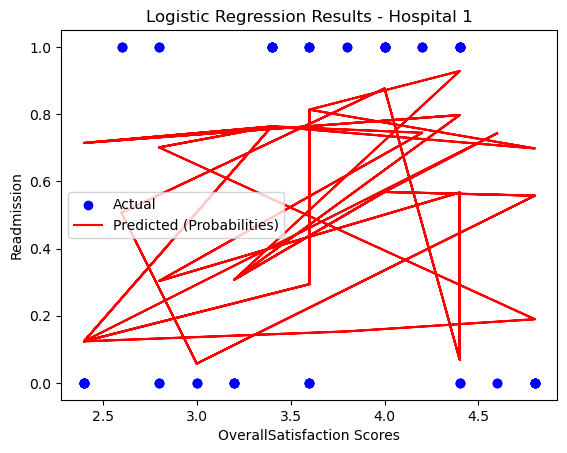


Hospital 2 Data Analysis:
----------------------
Number of Patients Readmitted: 29
Average Staff Satisfaction: 3.53
Average Cleanliness Satisfaction: 3.63
Average Food Satisfaction: 3.56
Average Comfort Satisfaction: 3.75
Average Communication Satisfaction: 3.72

Logistic Regression Results:
Correlation between Overall Satisfaction Scores and Readmission: Weak correlation


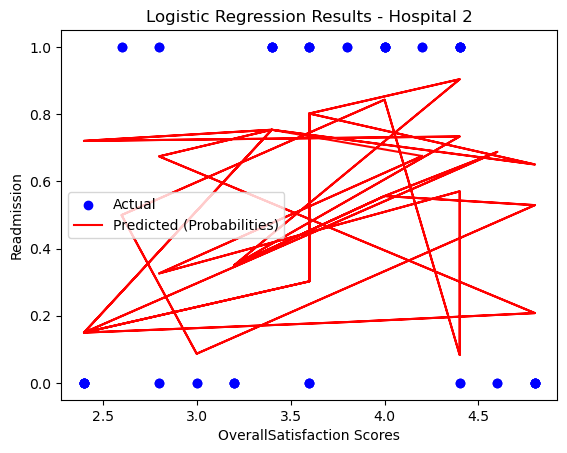


Hospital Comparison:

Hospital 1 Logistic Regression Results:
----------------------------
Correlation between Overall Satisfaction Scores and Readmission: Weak correlation

Hospital 2 Logistic Regression Results:
----------------------------
Correlation between Overall Satisfaction Scores and Readmission: Weak correlation

Based on the logistic regression results:
Both hospitals have about the same correlation strengths.


In [190]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

def read_data(file_path):
    data = []
    with open(file_path, 'r') as file:
        next(file)  # Skip the header line
        for line in file:
            patient_data = line.strip().split(',')
            data.append({
                'PatientID': int(patient_data[0]),
                'Readmission': int(patient_data[1]),
                'StaffSatisfaction': int(patient_data[2]),
                'CleanlinessSatisfaction': int(patient_data[3]),
                'FoodSatisfaction': int(patient_data[4]),
                'ComfortSatisfaction': int(patient_data[5]),
                'CommunicationSatisfaction': int(patient_data[6])
            })
    return data

def calculate_statistics(data, hospital_name):
    print(f"\n{hospital_name} Data Analysis:")
    print("----------------------")

    readmitted_count = sum(patient['Readmission'] for patient in data)
    print(f"Number of Patients Readmitted: {readmitted_count}")

    categories = ['StaffSatisfaction', 'CleanlinessSatisfaction', 'FoodSatisfaction',
                  'ComfortSatisfaction', 'CommunicationSatisfaction']
    for category in categories:
        average_score = np.mean([patient[category] for patient in data])
        print(f"Average {category.replace('Satisfaction', '')} Satisfaction: {average_score:.2f}")

def logistic_regression(data, hospital_name):
    X = np.array([[patient['StaffSatisfaction'], patient['CleanlinessSatisfaction'],
                   patient['FoodSatisfaction'], patient['ComfortSatisfaction'],
                   patient['CommunicationSatisfaction']] for patient in data])
    y = np.array([patient['Readmission'] for patient in data])
    
    overall_satisfaction = np.mean(X, axis=1)
    X = np.column_stack((X, overall_satisfaction))


    model = LogisticRegression()
    model.fit(X, y)

    print("\nLogistic Regression Results:")
   
    correlation_strength = "Weak" if abs(model.coef_[0][0]) < 0.5 else "Strong"
    print(f"Correlation between Overall Satisfaction Scores and Readmission: {correlation_strength} correlation")

    # Display the plot of the logistic regression results
    plt.scatter(overall_satisfaction, y, color='blue', label='Actual')
    
    # Plotting the predicted probabilities as a line
    y_pred_prob = model.predict_proba(X)[:, 1]
    plt.plot(overall_satisfaction, y_pred_prob, color='red', label='Predicted (Probabilities)')
    
    plt.xlabel('OverallSatisfaction Scores')
    plt.ylabel('Readmission')
    plt.title(f'Logistic Regression Results - {hospital_name}')
    plt.legend()
    plt.show()

def compare_hospitals(hospital1_data, hospital2_data):
    print("\nHospital Comparison:")
    

    X_hospital1 = np.array([[patient['StaffSatisfaction'], patient['CleanlinessSatisfaction'],
                             patient['FoodSatisfaction'], patient['ComfortSatisfaction'],
                             patient['CommunicationSatisfaction']] for patient in hospital1_data])
    y_hospital1 = np.array([patient['Readmission'] for patient in hospital1_data])

    model_hospital1 = LogisticRegression()
    model_hospital1.fit(X_hospital1, y_hospital1)

    X_hospital2 = np.array([[patient['StaffSatisfaction'], patient['CleanlinessSatisfaction'],
                             patient['FoodSatisfaction'], patient['ComfortSatisfaction'],
                             patient['CommunicationSatisfaction']] for patient in hospital2_data])
    y_hospital2 = np.array([patient['Readmission'] for patient in hospital2_data])

    model_hospital2 = LogisticRegression()
    model_hospital2.fit(X_hospital2, y_hospital2)

    print("\nHospital 1 Logistic Regression Results:")
    print("----------------------------")
    correlation_strength_h1 = "Weak" if abs(model_hospital1.coef_[0][0]) < 0.5 else "Strong"
    print(f"Correlation between Overall Satisfaction Scores and Readmission: {correlation_strength_h1} correlation")

    print("\nHospital 2 Logistic Regression Results:")
    print("----------------------------")
    correlation_strength_h2 = "Weak" if abs(model_hospital2.coef_[0][0]) < 0.5 else "Strong"
    print(f"Correlation between Overall Satisfaction Scores and Readmission: {correlation_strength_h2} correlation")

    print("\nBased on the logistic regression results:")
    if correlation_strength_h1 == "Strong" and correlation_strength_h2 == "Weak":
        print("Hospital 1 has a stronger correlation, evident of a larger impact of satisfaction on readmission rates.")
    elif correlation_strength_h1 == "Weak" and correlation_strength_h2 == "Strong":
        print("Hospital 2 has a stronger correlation, evident of a larger impact of satisfaction on readmission rates.")
    else:
        print("Both hospitals have about the same correlation strengths.")

if __name__ == "__main__":
    hospital1_data = read_data('Hospital1.txt')
    hospital2_data = read_data('Hospital2.txt')

    calculate_statistics(hospital1_data, 'Hospital 1')
    logistic_regression(hospital1_data, 'Hospital 1')

    calculate_statistics(hospital2_data, 'Hospital 2')
    logistic_regression(hospital2_data, 'Hospital 2')

    compare_hospitals(hospital1_data, hospital2_data)
